Put name here:

Usual initializations:

In [1]:
import math
import matplotlib.pyplot as plot
import random
import csv

To show images:

In [2]:
from IPython.display import Image

## Random walk

This little loop simulations a random walk. A fixed 
step size (r=1) is chosen and then a random direction
is selected in spherical coordinates $(r,\theta,\phi)$. 
The walk is stored in the arrays xa, ya, and za. 
Finally, the x and y arrays are plotted (the z array
is ignored). 

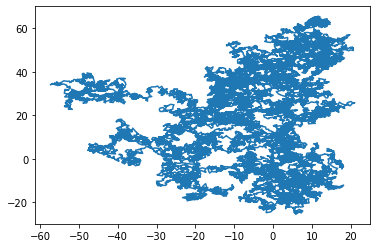

In [3]:
x=0
y=0
z=0
xa=[0]
ya=[0]
za=[0]
for i in range(0,20000):
    r=1
    theta=random.random()*math.pi
    phi=random.random()*math.pi*2
    dx=r*math.cos(phi)*math.sin(theta)
    dy=r*math.sin(phi)*math.sin(theta)
    dz=r*math.cos(theta)
    x=x+dx
    y=y+dy
    z=z+dz
    xa.append(x)
    ya.append(y)
    za.append(z)
plot.plot(xa,ya)
plot.show()
    

Task 1: In a random walk, the distance traveled is
    proportional to the square root of the number of steps. In this
    case, since the step size is 1, these two quantities are not just
    proportional, they are approximately equal. <font color="red">
    In the code below, replace the "80" 
    below, to compute the distance traveled.</font> In order to do this, think
    of the location as a vector (xa[i],ya[i],za[i]). Then the distance
    traveled is just the "norm", or length, of that vector.

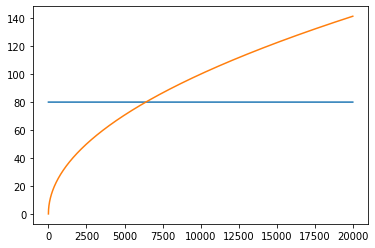

In [4]:
num_steps=[]
dist=[]
sqrta=[]
for i in range(0,len(xa)):
    num_steps.append(i)
    dist.append(80)
    sqrta.append(math.sqrt(i))
plot.plot(num_steps,dist)
plot.plot(num_steps,sqrta)
plot.show()

## Q values of nuclear reactions

In order to compute the "Q values" (amount of energy
released) in various nuclear reactions, we want to use
$E=m c^2$, so we need the nuclear masses. In nuclear 
physics, it is traditional to write the masses already
including the factor of $c^2$ in a unit called "MeV". 
This code reads a data file includes all of the known 
nuclear masses. 

In [5]:
nuc_data={}
with open('data/ame.csv') as csvfile:
    reader = csv.reader(csvfile)
    names=next(reader)
    for i in range(0,len(names)):
        nuc_data[names[i]]=[]
    for row in reader:
        for i in range(0,len(row)):
            if row[i] is not '':
               nuc_data[names[i]].append(row[i])                   
print('Column names:',names)
print('Number of columns:',len(names))
print('First column',names[0])

Column names: ['Z', 'N', 'm']
Number of columns: 3
First column Z


Now we define a function which, given Z (the number of 
protons) and N (the number of neutrons) returns the
mass of the specified nucleus. 

In [6]:
def mass(Z,N):
    for i in range(0,len(nuc_data["Z"])):
        if (int(nuc_data["Z"][i])==Z and
            int(nuc_data["N"][i])==N):
            return float(nuc_data["m"][i])
    raise ValueError('Nucleus not found.')

We also need the mass of the electron in MeV:

In [7]:
melectron=0.511

The first reaction in the pp-chain (which powers the sun), is
$$
p + p \rightarrow {^{2}_{1}\mathrm{H}} + e^{+} + \nu_{e}
$$
To compute the Q value, we just take the mass of the LHS and
subtract the mass of the RHS. (For now, presume that photons ($\gamma$)
and neutrinos ($\nu_e$) take away and give no energy.)
This reaction is followed 
quickly by
$$
e^{+} + e^{-} \rightarrow \gamma
$$
Thus putting these two together, 
$$
p + p + e^{-}\rightarrow {^{2}_{1}\mathrm{H}} + \gamma + \nu_{e}
$$

<font color="red">Task 2: In the line below, compute the Q value of this reaction, 
    in MeV (Hint: it should be between 1 and 2)</font>

In [8]:
print(0)

0


In the next step of the pp chain, the reaction is
$$
 {^{2}_{1}\mathrm{H}} +  {^{1}_{1}\mathrm{H}} \rightarrow  {^{3}_{2}\mathrm{He}} + \gamma 
$$
<font color="red">Task 3: In the line below, compute the Q value of this reaction</font>

In [9]:
print(0)

0


The final reaction is
$$
 {^{3}_{2}\mathrm{He}} +  {^{3}_{2}\mathrm{He}} \rightarrow  {^{4}_{2}\mathrm{He}} + 2 {^{1}_{1}\mathrm{H}}
$$
<font color="red">Task 4: In the line below, compute the Q value of this reaction</font>

In [10]:
print(0)

0


<font color="red">Task 5: Compute the (approximate) total energy obtained (in MeV) in the pp-chain 
    over all 3 types reactions after constructing one Helium-4 nucleus. However, keep in mind that you may
need to perform some reactions twice.</font>

## The CNO cycle

The CNO cycle (image from https://en.wikipedia.org/wiki/CNO_cycle) is:

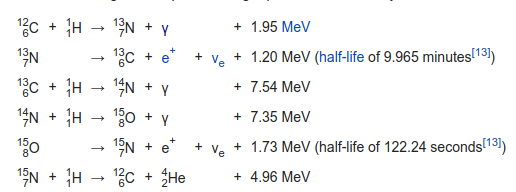

In [11]:
Image("images/cno.png")

<font color="red">Task 6: Compute the total amount of energy obtained
    in the CNO cycle by simply adding up all of the Q values on the
    RHS:</font>

In [12]:
print(0)

0


This process creates two positrons, which lead to 
two reactions of the form
$$
e^{+} + e^{-} \rightarrow \gamma
$$
which we saw earlier. These two reactions give an
additional amount of energy.

In [13]:
print(2*(melectron+melectron))

2.044


If you add this 2.04 MeV, the total amount of energy obtained in
the CNO cycle should be the same as in the pp chain we described
above. <font color="red">Task 7: In the cell below, explain why</font>:

## Gamow Window:

In order to fuse, nuclei must overcome their Coulomb repulsion. All
nuclei have protons inside, and thus two nuclei naturally "repel"
each other. The only way that nuclear fusion works in the sun is because
of quantum mechanics. Quantum "tunneling" allow fusion reactions to happen. 

We describe the probability of a nuclear reaction as a function of
energy. At low energies, a nucleus is unlikely to "tunnel through the
Coulomb barrier" in order to fuse. The probability of tunneling
is given by:
$$
P \propto \exp \left[ - \left(\frac{E_{\mathrm{G}}}{E}\right)^{1/2} \right]
$$
where 
$$
E_G = 2 \frac{m_1 m_2}{m_1+m_2} c^2 \left( \pi \alpha Z_1 Z_2 \right)^2 
$$
and $\alpha=1/137$. Thus high energy nuclei are more likely to tunnel. 

However, the number of high energy nuclei is limited. Nuclei 
obey a Maxwell-Boltzmann distribution, 
$$
f(E) = \exp \left( \frac{E}{k_B T}\right)
$$
this means there is a happy medium in the middle. This
is called the "Gamow Window". The peak of the Gamow 
window is at $E_0 = E_{\mathrm{G}}^{1/3} \left( \frac{k_B T}{2} \right)^{2/3} $

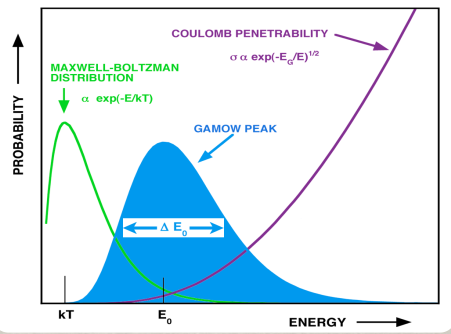

In [14]:
Image("images/gwindow.png")

Presuming the central temperature of the sun is $1.5 \times 10^{7}$ K,
Boltzmann's constant $ k_B = 1.38 \times 10^{-23}~\mathrm{J}/\mathrm{K} $, 
the mass of the proton is $ m_p= 1.6726 \times 10^{-27}~\mathrm{kg} $, 
and that $1~\mathrm{MeV} = 1.602 \times 10^{-13}~\mathrm{J}$, 
<font color="red">Task 8: Compute the peak of the Gamow Window in MeV</font>:

In [15]:
print(0)

0
